In [1]:
import tensorflow as tf
from tensorflow import keras as k

In [2]:
(train_images, train_labels), (test_images, test_labels) = k.datasets.mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28, 1)

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = k.utils.to_categorical(train_labels)
test_labels = k.utils.to_categorical(test_labels)

In [31]:
network = k.models.Sequential()
network.add(k.layers.Conv2D(32,(28,28), activation="relu", padding='same', input_shape=(28,28,1)))
network.add(k.layers.MaxPooling2D((2,2)))
network.add(k.layers.Conv2D(64,(4,4), activation="relu", padding='valid'))
network.add(k.layers.MaxPooling2D((2,2)))
network.add(k.layers.Flatten())
network.add(k.layers.Dense(10, activation='softmax'))

In [32]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [33]:
network.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25120     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                16010     
Total params: 73,962
Trainable params: 73,962
Non-trainable params: 0
__________________________________________________

In [34]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 100)

Epoch 1/5
106/600 [====>.........................] - ETA: 5:30 - loss: 0.5607 - accuracy: 0.8240

KeyboardInterrupt: 

In [30]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.0658 - accuracy: 0.9817


In [94]:
test_acc

0.9825000166893005

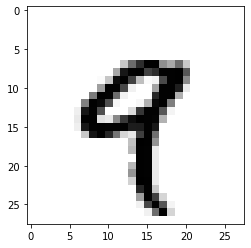

In [98]:
import matplotlib.pyplot as plt
plt.imshow(train_images[4], cmap=plt.cm.binary)
plt.show()

In [42]:
inputs = k.Input(shape=(28,28, 1,))

In [43]:
inputs.dtype

tf.float32

In [44]:
conv1 = k.layers.Conv2D(4,4, activation="relu")

In [45]:
o1 = conv1(inputs)

In [46]:
o2 = k.layers.Flatten()(o1)

In [47]:
output = k.layers.Dense(10, activation = "softmax")(o2)

In [48]:
testModel = k.Model(inputs=inputs, outputs=output)

In [97]:
testModel.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 4)         68        
_________________________________________________________________
flatten_2 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                25010     
Total params: 25,078
Trainable params: 0
Non-trainable params: 25,078
_________________________________________________________________


In [50]:
testModel.compile(optimizer="adam", loss="categorical_crossentropy", metrics = ['accuracy'])

In [82]:
testModel.fit(train_images, train_labels, batch_size = 100, epochs = 5)

Epoch 1/5
600/600 [==============================] - 6s 10ms/step - loss: 0.0985 - accuracy: 0.9718
Epoch 2/5
600/600 [==============================] - 6s 10ms/step - loss: 0.0808 - accuracy: 0.9757
Epoch 3/5
600/600 [==============================] - 6s 10ms/step - loss: 0.0717 - accuracy: 0.9783
Epoch 4/5
600/600 [==============================] - 6s 10ms/step - loss: 0.0678 - accuracy: 0.9799
Epoch 5/5
600/600 [==============================] - 6s 10ms/step - loss: 0.0631 - accuracy: 0.9810


In [83]:
testModel.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0768 - accuracy: 0.9753


[0.07678914070129395, 0.9753000140190125]

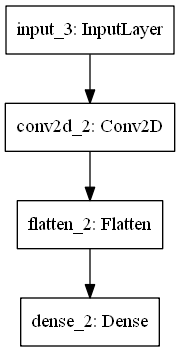

In [84]:
import pydot
k.utils.plot_model(testModel, "test.png")

In [99]:
testModel.get_weights()[0]

array([[[[ 0.15573373,  0.45663717,  0.2970187 ,  0.18063384]],

        [[ 0.1646963 , -0.48503196,  0.49066016,  0.37104157]],

        [[ 0.2535197 , -0.28831714,  0.6845282 ,  0.6217921 ]],

        [[-0.4345848 , -0.10379525,  0.7609497 , -0.4617067 ]]],


       [[[-0.04204521, -0.51693565,  0.40531453,  0.4053207 ]],

        [[ 0.5045552 ,  0.13549055,  0.49504653,  0.7406252 ]],

        [[ 0.17599936, -0.2988815 ,  0.66402906,  0.1876017 ]],

        [[ 0.16541977,  0.11846259,  0.400379  , -0.9429868 ]]],


       [[[ 0.24742666, -0.11966307, -0.33775818,  0.45203125]],

        [[-0.06335827, -0.0936343 , -0.02338603,  0.20447247]],

        [[-0.10974565,  0.23590088, -0.21283485, -0.01439919]],

        [[ 0.19941275,  0.3940218 , -0.36512455, -1.5547898 ]]],


       [[[-0.14404425,  0.26781955, -1.5985492 ,  0.19333766]],

        [[ 0.3068783 ,  0.40338966, -1.6953334 ,  0.5350348 ]],

        [[-0.06211746,  0.21523297, -1.4390479 , -0.50795805]],

        [[ 0.320518

In [89]:
f1 = k.layers.Flatten()(o1)
f0 = k.layers.Flatten()(inputs)

In [90]:
concat1 = k.layers.Concatenate()([f0, f1])

In [91]:
concat1.shape

TensorShape([None, 3284])

In [92]:
output2 = k.layers.Dense(10, activation='softmax')(concat1)

In [93]:
model2 = k.Model(inputs=inputs,outputs=output2)

In [101]:
model2.summary()

Model: "functional_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 25, 25, 4)    68          input_3[0][0]                    
__________________________________________________________________________________________________
flatten_7 (Flatten)             (None, 784)          0           input_3[0][0]                    
__________________________________________________________________________________________________
flatten_6 (Flatten)             (None, 2500)         0           conv2d_2[0][0]                   
______________________________________________________________________________________

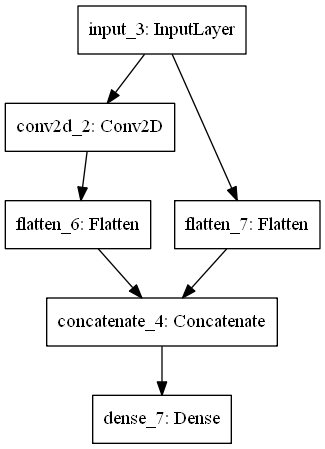

In [100]:
k.utils.plot_model(model2, "test2.png")

In [102]:
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics = ['accuracy'])

In [103]:
model2.fit(train_images, train_labels, batch_size = 100, epochs = 5)

Epoch 1/5
600/600 [==============================] - 4s 6ms/step - loss: 0.2230 - accuracy: 0.9380
Epoch 2/5
600/600 [==============================] - 4s 6ms/step - loss: 0.1081 - accuracy: 0.9697
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0884 - accuracy: 0.9746
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0783 - accuracy: 0.9770
Epoch 5/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0704 - accuracy: 0.9795


In [96]:
testModel.trainable=False

In [ ]:
class tp1:
    def __init__(self, w):
        